### Problem Statement:

**Context**:
The Gurugram-based FlipItNews aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors

**Objective**:
The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

### Attribute Information:

* Article
* Category

The feature names are themselves pretty self-explanatory.

### Our Approach:

1. Importing the libraries
2. Loading the dataset
  * Mounting the drive
  * Reading the data file
3. Data Exploration
  * Shape of the dataset
  * News articles per category
4. Text Processing
  * Removing the non-letters
  * Tokenizing the text
  * Removing stopwords
  * Lemmatization
5. Data Transformation
  * Encoding the target variable
  * Bag of Words
  * TF-IDF
  * Train-Test Split
6. Model Training & Evaluation
  * Simple Approach
    * Naive Bayes
  * Functionalized Code
    * Decision Tree
    * Nearest Neighbors
    * Random Forest

#### Importing the libraries -

In [77]:
# To ignore all warnings
import warnings

# For reading & manipulating the data
import pandas as pd
import numpy as np

# For visualizing the data
!pip install matplotlib --upgrade
import matplotlib.pyplot as plt
import seaborn as sns

# To use Regular Expressions
import re

# To use Natural Language Processing
import nltk

# For tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# To remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

# For lemmetization
from nltk import WordNetLemmatizer
nltk.download('wordnet')

# For BoW & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# For encoding the categorical variable
!pip install category_encoders
import category_encoders as ce

# To try out different ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# To perform train-test split
from sklearn.model_selection import train_test_split

# Performace Metrics for evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Loading the dataset -

Mounting the drive -

In [78]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [79]:
link = "https://drive.google.com/file/d/1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u/view?usp=sharing"

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('news-articles.csv')

Reading the data file -

In [80]:
df = pd.read_csv('news-articles.csv')
df.sample(10)

,Category,Article
1098,Entertainment,bbc denies blackadder tv comeback the bbc has ...
527,Business,bank payout to pinochet victims a us bank has ...
1833,Business,us gives foreign firms extra time foreign firm...
1647,Technology,game makers get xbox 2 sneak peek microsoft ha...
960,Business,fed warns of more us rate rises the us looks s...
200,Sports,holmes feted with further honour double olympi...
339,Politics,russian ex-spy on hunger strike an ex-russian ...
942,Sports,butler strikes gold in spain britain s kathy b...
2098,Business,irish company hit by iraqi report shares in ir...
818,Business,parmalat boasts doubled profits parmalat the ...


#### Data Exploration

First, let's check the shape of the dataset that we have.

In [81]:
print("No. of rows: {}".format(df.shape[0]))

No. of rows: 2225


*Observation: There are 2,225 different news articles present in the dataset.*

**No. of news articles per category -**

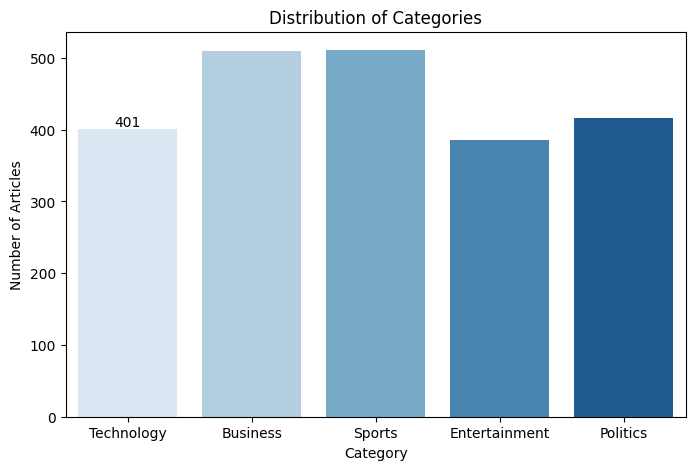

In [82]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Category', data=df, palette='Blues')

ax.bar_label(ax.containers[0])

ax.set_title('Distribution of Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Articles')

plt.show()

*Observation: Most of the news articles in the dataset are from Business & Sports category.*

#### Text Processing

Before processing -

In [83]:
df['Article'][1]

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

This is how a single news article in our dataset looks before processing. <br>
We can see that everything is already in lower case so we don't need to do that explicitly.

In [84]:
stop_words = list(stopwords.words("english"))

def text_process(sent):
  # Removing non-letters
  sent = re.sub('[^a-zA-Z]', ' ', sent)

  # Word tokenizing the text
  words = nltk.word_tokenize(sent)

  # Removing stopwords
  filtered_sent = [w for w in words if not w in stop_words]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  new_txt = [lemmatizer.lemmatize(word) for word in filtered_sent]
  new_txt = " ".join(new_txt)

  return new_txt

df['Article'] = df['Article'].apply(text_process)


After processing -

In [85]:
df['Article'][1]

'worldcom bos left book alone former worldcom bos bernie ebbers accused overseeing bn bn fraud never made accounting decision witness told juror david myers made comment questioning defence lawyer arguing mr ebbers responsible worldcom problem phone company collapsed prosecutor claim loss hidden protect firm share mr myers already pleaded guilty fraud assisting prosecutor monday defence lawyer reid weingarten tried distance client allegation cross examination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom book mr weingarten pressed replied witness mr myers admitted ordered false accounting entry request former worldcom chief financial officer scott sullivan defence lawyer trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house card mr ebbers team meanwhile looking portray affable bos admission pe graduate economist whatever ability mr ebbers transformed

This is what an article obtained after text processing looks like.

#### Data Transformation

**Encoding the target variable -**

We will be using the OrdinalEncoder from category_encoders.

It encodes categorical features as ordinal, in one ordered feature.
Ordinal encoding uses a single column of integers to represent the classes.

For more details you can refer to this link: https://contrib.scikit-learn.org/category_encoders/

In [86]:
encode = ce.OrdinalEncoder(cols=['Category'])
df = encode.fit_transform(df)

**Outcome labels after encoding -**

Category:

1 - Technology

2 - Business

3 - Sports

4 - Entertainment

5 - Politics

**Bag of Words / TF-IDF**

We've given the user a choice to select one of the following techniques for vectorizing the data -
* BoW
* TF-IDF

In [103]:
df

,Category,Article
0,1,tv future hand viewer home theatre system plas...
1,2,worldcom bos left book alone former worldcom b...
2,3,tiger wary farrell gamble leicester say rushed...
3,3,yeading face newcastle fa cup premiership side...
4,4,ocean twelve raid box office ocean twelve crim...
...,...,...
2220,2,car pull u retail figure u retail sale fell ja...
2221,5,kilroy unveils immigration policy ex chatshow ...
2222,4,rem announce new glasgow concert u band rem an...
2223,5,political squabble snowball become commonplace...


In [87]:
choice = int(input("Choose \n (1) If you want to use Bag of Words \n (2) If you want to use TF-IDF \n Choice: "))

if choice == 1:
  cv = CountVectorizer(max_features=5000) #BOW
  X = cv.fit_transform(df. Article).toarray()
  y = np.array(df['Category'].values)

elif choice == 2:
  tf_idf = TfidfVectorizer() #TF-IDF
  X = tf_idf.fit_transform(df.Article).toarray()
  y = np.array(df['Category'].values)

else:
  print("Wrong Input!")

Choose 
 (1) If you want to use Bag of Words 
 (2) If you want to use TF-IDF 
 Choice: 2


Performing train-test split -

In [88]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25,
                                                  shuffle=True, stratify=y,
                                                  random_state=42)

Final shape of the train & test set.

In [89]:
print("No. of rows in train set is {}.".format(X_train.shape[0]))
print("No. of rows in test set is {}.".format(X_val.shape[0]))

No. of rows in train set is 1668.
No. of rows in test set is 557.


### Simple Approach -

First, we'll follow a basic approach to create a model for this multi-class classification problem.

####**Naive Bayes Classifier**

The very first ML algorithm that we'll be trying is Naive Bayes Classifier.

In [90]:
# Training the model -
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [91]:
# Calculating the train & test accuracy -
nb_train = accuracy_score(y_train, nb.predict(X_train))
nb_test = accuracy_score(y_val, nb.predict(X_val))

print("Train accuracy :{:.3f}".format(nb_train))
print("Test accuracy :{:.3f}".format(nb_test))

Train accuracy :0.988
Test accuracy :0.977


In [92]:
# Making predictions on the test set -
y_pred_nb = nb.predict(X_val)
y_pred_proba_nb = nb.predict_proba(X_val)

In [93]:
# Computing the ROC AUC score -
print("ROC AUC Score: {:.3f}".format(roc_auc_score(y_val, y_pred_proba_nb, multi_class='ovr')))

ROC AUC Score: 0.999


In [94]:
# Computing the precision, recall & f1 score -
precision = precision_score(y_val, y_pred_nb, average='weighted')
recall = recall_score(y_val, y_pred_nb, average='weighted')
f1 = f1_score(y_val, y_pred_nb, average='weighted')

print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

Precision: 0.977
Recall: 0.977
F1 Score: 0.977


Plotting the Confusion Matrix -

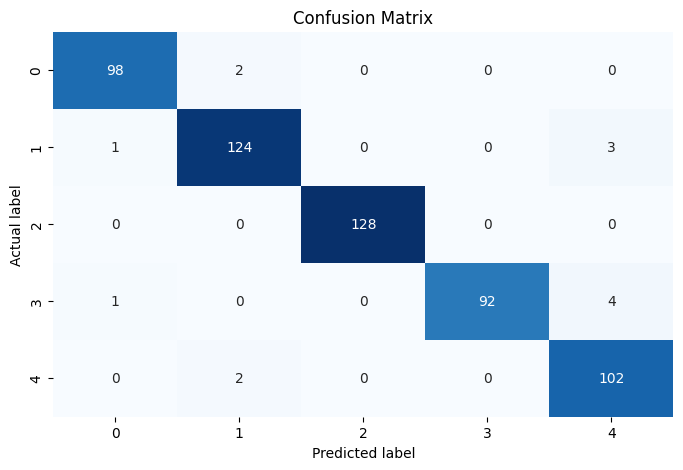

In [95]:
cm = confusion_matrix(y_val, y_pred_nb)

plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

Printing the Classification Report -

In [96]:
print(classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       100
           2       0.97      0.97      0.97       128
           3       1.00      1.00      1.00       128
           4       1.00      0.95      0.97        97
           5       0.94      0.98      0.96       104

    accuracy                           0.98       557
   macro avg       0.98      0.98      0.98       557
weighted avg       0.98      0.98      0.98       557



### Functionalized Code -

Now, we'll try to functionalize the above code so that we can use it for a few more different models.

#### Model Training

In [97]:
def model_train(obj):
  obj.fit(X_train, y_train) # Training the model
  y_pred = obj.predict(X_val) # Making predictions
  y_pred_proba = obj.predict_proba(X_val)
  return y_pred, y_pred_proba

#### Model Evaluation

In [98]:
def model_eval(obj, y_pred, y_pred_proba):
  print("-------------------------")

  # Calculating the train & test accuracy
  train_acc = accuracy_score(y_train, obj.predict(X_train))
  test_acc = accuracy_score(y_val, obj.predict(X_val))

  print("Train Accuracy: {:.3f}".format(train_acc))
  print("Test Accuracy: {:.3f}\n".format(test_acc))

  # Computing the ROC AUC score
  print("ROC AUC Score: {:.3f}\n".format(roc_auc_score(y_val, y_pred_proba, multi_class='ovr')))

  # Computing the precision, recall & f1 score
  precision = precision_score(y_val, y_pred, average='weighted')
  recall = recall_score(y_val, y_pred, average='weighted')
  f1 = f1_score(y_val, y_pred, average='weighted')

  print("Precision: {:.3f}".format(precision))
  print("Recall: {:.3f}".format(recall))
  print("F1 Score: {:.3f}".format(f1))

  print("-------------------------")

Now, let us try out a few more different ML algorithm to see how they perform for this problem, on this dataset.

**Decision Tree Classifer**

In [99]:
# Creating the model object -
dt = DecisionTreeClassifier()

# Training the model -
y_pred_dt, y_pred_proba_dt = model_train(dt)

# Evaluatong the model -
model_eval(dt, y_pred_dt, y_pred_proba_dt)

-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.860

ROC AUC Score: 0.912

Precision: 0.861
Recall: 0.860
F1 Score: 0.860
-------------------------


**Nearest Neighbors Classifier**

In [100]:
# Creating the model object -
knn = KNeighborsClassifier(n_neighbors=5)

# Training the model -
y_pred_knn, y_pred_proba_knn = model_train(knn)

# Evaluatong the model -
model_eval(knn, y_pred_knn, y_pred_proba_knn)

-------------------------
Train Accuracy: 0.965
Test Accuracy: 0.934

ROC AUC Score: 0.988

Precision: 0.935
Recall: 0.934
F1 Score: 0.933
-------------------------


**Random Forest Classifier**

In [101]:
# Creating the model object -
rf = RandomForestClassifier()

# Training the model -
y_pred_rf, y_pred_proba_rf = model_train(rf)

# Evaluatong the model -
model_eval(rf, y_pred_rf, y_pred_proba_rf)

-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.968

ROC AUC Score: 0.998

Precision: 0.968
Recall: 0.968
F1 Score: 0.968
-------------------------


*Observation: Out of all the models tested till now, Naive Bayes Classifier seems to be the best performing one since it gives good train & test accuracy, more than satisfactory precision & recall and almost non-significant overfitting.*

